<a href="https://colab.research.google.com/github/feranzie/NLP-analysis-of-books/blob/main/Apocolocyntosis_book_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from pprint import pprint
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import ngrams, FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import re
from gensim.summarization import summarize
from gensim.summarization import keywords
import spacy
import seaborn as sns
##print "all imports worked nicely"
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
# opening the text file and reading it's contents and removing empty lines.
txt=[]
with open("/content/10001.txt","r") as f:
 for i in f.readlines():
       if not i.strip():
           continue
       if i:
         txt.append(i)

In [ ]:
txt

['The Project Gutenberg EBook of Apocolocyntosis, by Lucius Seneca\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n',
 'with this eBook or online at www.gutenberg.org\n',
 'Title: Apocolocyntosis\n',
 'Author: Lucius Seneca\n',
 'Release Date: November 10, 2003 [EBook #10001]\n',
 '[Date last updated: April 9, 2005]\n',
 'Language: English\n',
 'Character set encoding: ASCII\n',
 '*** START OF THIS PROJECT GUTENBERG EBOOK APOCOLOCYNTOSIS ***\n',
 'Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders\n',
 '                       SENECA\n',
 '                  APOCOLOCYNTOSIS\n',
 '          WITH AN ENGLISH TRANSLATION BY\n',
 '            W.H.D. ROUSE, M.A. LITT. D.\n',
 '                       MCMXX\n',
 'INTRODUCTION\n',
 'This piece is ascribed to Seneca by ancient tradition; it is impossible\n',
 

In [ ]:
txt[11][-1]

'\n'

In [ ]:
a=[]
for i in txt:
  a.append(i[:-1])

In [ ]:
a

['The Project Gutenberg EBook of Apocolocyntosis, by Lucius Seneca',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 'Title: Apocolocyntosis',
 'Author: Lucius Seneca',
 'Release Date: November 10, 2003 [EBook #10001]',
 '[Date last updated: April 9, 2005]',
 'Language: English',
 'Character set encoding: ASCII',
 '*** START OF THIS PROJECT GUTENBERG EBOOK APOCOLOCYNTOSIS ***',
 'Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders',
 '                       SENECA',
 '                  APOCOLOCYNTOSIS',
 '          WITH AN ENGLISH TRANSLATION BY',
 '            W.H.D. ROUSE, M.A. LITT. D.',
 '                       MCMXX',
 'INTRODUCTION',
 'This piece is ascribed to Seneca by ancient tradition; it is impossible',
 'to prove that it is his, and impossible

In [ ]:
txt=a

In [ ]:
txt[18]

'INTRODUCTION'

In [ ]:
book=txt[18:483]

In [ ]:
book

['INTRODUCTION',
 'This piece is ascribed to Seneca by ancient tradition; it is impossible',
 'to prove that it is his, and impossible to prove that it is not. The',
 'matter will probably continue to be decided by every one according to his',
 "view of Seneca's character and abilities: in the matters of style and of",
 'sentiment much may be said on both sides. Dion Cassius (lx, 35) says that',
 'Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of',
 'Claudius after his death, the title being a parody of the usual',
 '[Greek: apotheosis]; but this title is not given in the MSS. of the Ludus',
 'de Morte Claudii, nor is there anything in the piece which suits the title',
 'very well.',
 'As a literary form, the piece belongs to the class called',
 '_Satura Menippea_, a satiric medley in prose and verse.',
 'This text is that of Buecheler, with a few trifling changes, which are',
 'indicated in the notes. We have been courteously allowed by Messrs',
 "Weidmann to use this

In [ ]:
##length of book
len(book)

465

In [ ]:
count = {}
for word in book:
   if word in count :
      count[word] += 1
   else:
      count[word] = 1


In [ ]:
##number of unique words in book
len(count) 

465

# **Data Cleaning**

# Lowercase the text

In [ ]:
book=list(map(lambda x: x.lower(), book))

# Remove digits and words containing digits

In [ ]:
book=list(map(lambda x: re.sub('\w*\d\w*','', x), book))

# Remove Punctuations

In [ ]:
book=list(map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x), book))

In [ ]:
# Removing extra spaces
book=list(map(lambda x: re.sub(' +',' ',x), book))

# Convert book into a string


In [ ]:
bk = ''.join(str(e) for e in book)

In [ ]:
bk

'introductionthis piece is ascribed to seneca by ancient tradition it is impossibleto prove that it is his and impossible to prove that it is not thematter will probably continue to be decided by every one according to hisview of senecas character and abilities in the matters of style and ofsentiment much may be said on both sides dion cassius lx says thatseneca composed an greek apokolokuntosis or pumpkinification ofclaudius after his death the title being a parody of the usualgreek apotheosis but this title is not given in the mss of the ludusde morte claudii nor is there anything in the piece which suits the titlevery wellas a literary form the piece belongs to the class calledsatura menippea a satiric medley in prose and versethis text is that of buecheler with a few trifling changes which areindicated in the notes we have been courteously allowed by messrsweidmann to use this text i have to acknowledge the help of mr ballsnotes from which i have taken a few references but my trans

# **Exploratory Analysis**

# Word Distribution
Chapterwise word distribution. WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size. Generating wordCloud showing the most frequently occurring words per Chapter.

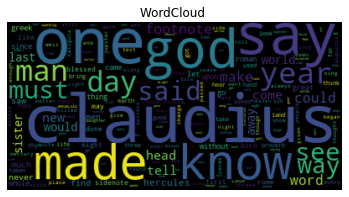

In [ ]:
color_flag = True
if color_flag:
  wordcloud = WordCloud(stopwords=stop_words).generate(bk)
else:
  wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(bk)
# Display the generated image:
plt.title("WordCloud ")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
color_flag = not color_flag
    ##chapter_count = chapter_count + 1


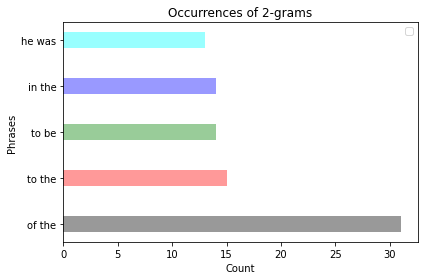

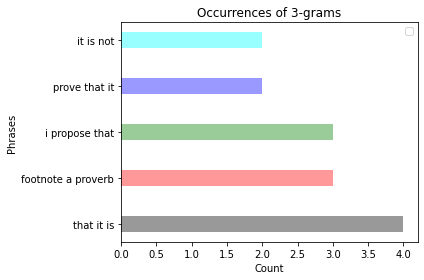

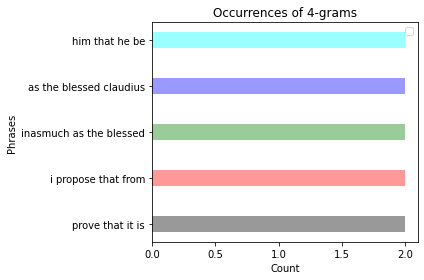

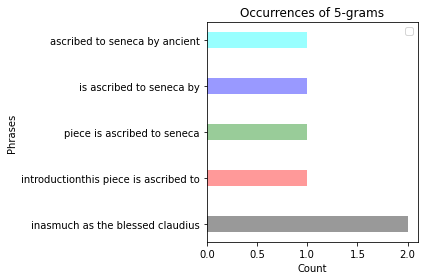

In [ ]:

# Phrase distribution(s) throughout the whole book
data = ''.join(book)
all_counts = dict()
# counting till n-grams, n ranging from 2..5 
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    fig, ax = plt.subplots()

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes 
 #formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

#tokenize
%time tokenized_text = [tokenize_and_stopWordsRemoval(text) for text in book]




CPU times: user 76.8 ms, sys: 1.28 ms, total: 78.1 ms
Wall time: 91.6 ms


In [ ]:
print (len(tokenized_text))
print (tokenized_text[41])
print (book[41])

465
['day', 'made', 'proverb', 'trueone', 'must', 'born', 'either', 'pharaoh']
day for him who made the proverb trueone must be born either a pharaoh


# Name and Place Identification
This can be achieved by Named Entity Recognition (NER). Here I first utilize Spacy for this purpose but after seeing quiet a few exceptions in the results, I have also shown the same task using NLTK's NER. Top 10 results for both the categories(Name of people and places) are shown below.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc_str = ""
for item in tokenized_text:
    doc_str = doc_str + " " + " ".join(item)
doc = nlp(doc_str)   
print (type(doc))

list_person = []
list_place = []

for X in doc.ents:
    if (X.label_ == u'PERSON'):
        list_person.append((X.text, X.label_))
    elif (X.label_ == u'GPE')| (X.label_ == u'LOC') :
        list_place.append((X.text, X.label_))

# Set operation on lists to remove the duplicate entries
list_person = list(set(list_person))
list_place = list(set(list_place))

#printing first 10 items in each category
print (list_person[:10])
print (list_place[:10])

<class 'spacy.tokens.doc.Doc'>
[('vienne native gaul', 'PERSON'), ('lucii annaei', 'PERSON'), ('messrs weidmann', 'PERSON'), ('juno', 'PERSON'), ('herondas iii', 'PERSON'), ('tom dick harry', 'PERSON'), ('amphaeus pheronactus sent', 'PERSON'), ('vica pota', 'PERSON'), ('myron', 'PERSON'), ('caligula caligula', 'PERSON')]
[('london', 'GPE'), ('jupiter', 'LOC'), ('diespiter', 'GPE'), ('new york columbia university', 'GPE'), ('britain', 'GPE'), ('chum', 'GPE'), ('rome', 'GPE'), ('hercules', 'GPE')]


In [ ]:
nltk_personList = []
nltk_placeList = []

import nltk
for sent in nltk.sent_tokenize(doc_str):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            if (chunk.label() == 'PERSON'):
                nltk_personList.append((chunk.label(), ' '.join(c[0] for c in chunk)))
            elif (chunk.label() == 'GPE'):
                nltk_placeList.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Set operation on lists to remove the duplicate entries
nltk_personList = list(set(nltk_personList))
nltk_placeList = list(set(nltk_placeList))

# printing first 10 items in each category
print (nltk_personList[:5])
print (nltk_placeList[:5])

[]
[]


In [ ]:
print ('Summary:%s' )
summary = summarize() 
print (summary)

Summary:%s


TypeError: ignored

In [ ]:
import re
my_string = "This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.org Title: The Little House in the Fairy Wood Author: Ethel Cook Eliot Release Date: December 15, 2003 [EBook #10463]"
s=txt
re.search(r'Title:(.*?)Author', my_string).group(1)


' The Little House in the Fairy Wood '

In [ ]:
import re
s = 'Part 1. Part 2. Part 3 then more text'
re.search(r'Part 1(.*?)Part 3', s).group(1)


'. Part 2. '